In [1]:
## IMPORTANT: On Colab, we expect your homework to be in the cs189 folder
## Please contact staff if you encounter any problems with installing dependencies
import sys
IS_COLAB = 'google.colab' in sys.modules
if IS_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/cs189/hw/hw0_demo
    %pip install -r ./requirements.txt
    !pip install -U kaleido plotly
    import kaleido
    kaleido.get_chrome_sync()
else:
    %pip install -r ./requirements.txt
    !pip install -U kaleido plotly
    import kaleido
    kaleido.get_chrome_sync()

import plotly.io as pio
pio.renderers.default = pio.renderers.default + "+png"


  Cloning https://github.com/BerkeleyML/otter-grader-189.git (to revision master) to /tmp/pip-install-bjscze18/otter-grader_18808cf2580b4430ae36acd2c39b1194
  Running command git clone --filter=blob:none --quiet https://github.com/BerkeleyML/otter-grader-189.git /tmp/pip-install-bjscze18/otter-grader_18808cf2580b4430ae36acd2c39b1194
  Resolved https://github.com/BerkeleyML/otter-grader-189.git to commit 35e43fdf64a55f4b9222d7b531890fb7d5cb498c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached matplotlib-3.10.8-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (52 kB)
  Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
  Using cached click-8.3

In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw.ipynb")

<link rel="stylesheet" href="berkeley.css">

<h1 class="cal cal-h1">Homework 0 – Homework Submission Demo!</h1>

Welcome to Homework 0!

---

## Due Date: Friday, September 27, 11:59 PM

This assignment is due on **Friday, September 27, at 11:59 PM**. You must submit your work to Gradescope by this deadline. Please refer to the syllabus for the [Slip Day policy](https://eecs189.org/fa25/syllabus/#slip-days). No late submissions will be accepted beyond the details outlined in the Slip Day policy.

### Submission Tips:
- **Plan ahead**: We strongly encourage you to submit your work several hours before the deadline. This will give you ample time to address any submission issues.
- **Reach out for help early**: If you encounter difficulties, contact course staff well before the deadline. While we are happy to assist with submission issues, we cannot guarantee responses to last-minute requests.

---

## Assignment Overview

You will complete all the TODOs in the notebook, which include both coding and written response questions. Some tasks are open-ended, which allows you to explore and experiment with different approaches.

### Key Learning Objectives:
1. Learn how to complete and submit a coding assignment for CS 189/289.

---

<div align="center">

### Grading Breakdown

| Question | Manual Grading? | Points |
|----------|-----------------|--------|
| 1        | No              | 2      |
| 2        | No              | 2      |
| 3        | Yes             | 1      |
| 4        | Yes             | 1      |
| 5        | No              | 2      |
| 6        | Yes             | 2      |
| **Total**|                 |  **10** |

</div>

**Note**: "Manual" questions are written response questions that will be graded manually by the course staff. All other questions will be graded automatically by the autograder.

---

### Instructions:
1. Carefully read each question and its requirements.
2. Complete all TODOs in the notebook. You may add extra lines of code if needed to implement your solution.
3. For manual questions, provide clear and concise written responses.
4. Test your code thoroughly to ensure it meets the requirements.

Good luck!

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import torchvision
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib  # For saving/loading the model

pd.options.plotting.backend = "plotly"

### **IMPORTANT:** 
- Do not change the random seed values!!!
- Before you submit your notebook, remember to set `save_models=True` and `load_models=True`. This saves your final models which we will use for the autograder. Set these to false if you are still tweaking your model setup. We have provided code for saving models - **do not change these file names!!**
- When uploading your notebook, make sure to include your model file `classifier.joblib` in your submission

In [16]:
# Set random seeds for reproducible results
SEED = 189
np.random.seed(SEED)
random.seed(SEED)

# IMPORTANT: set save_models to True to save trained models. YOU NEED TO DO THIS FOR THE AUTOGRADER TO WORK.
save_models = True
load_saved_models = True # After training, you can set this to True to load the saved models and not have to re-train them.
IS_GRADING_ENV = os.getenv("IS_GRADING_ENV") == "true"

# Question 1

**Task**: 
1. Write a function that takes in a number and returns its square

In [5]:
def square(x):
    """Write a function to return the square of the input"""
    return x * x

In [6]:
grader.check("q1")

q1 results: All test cases passed!

# Question 2

**Task**:
1. Write a function that computes the square of a matrix: ${A^T A}$

In [7]:
def square_matrix(A):
    """Return the square of matrix A"""
    return A @ A

In [8]:
grader.check("q2")

q2 results: All test cases passed!

# Question 3

**Question**: What is your favorite dinosaur?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

# Question 4

**Task:**
1. Create a DataFrame of the CIFAR10 dataset with three columns: `image`, `class`, and `label`. The `image` column should be a list of the pixel values, the `class` column should be the integer label (e.g. 0, 1, 2, ..., 9) and the `label` column should be the class label (e.g. 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
2. Group the data in the CIFAR10 dataset by label
3. Create a histogram of the label distribution with labels on the x-axis and count on the y-axis


<!-- BEGIN QUESTION -->



100.0%
/home/xichen/dev/BKL-fa25-student/venv/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning:

dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)



Loaded CIFAR10 dataset with 50000 samples.
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Image shape: (32, 32, 3)
Image dtype: uint8


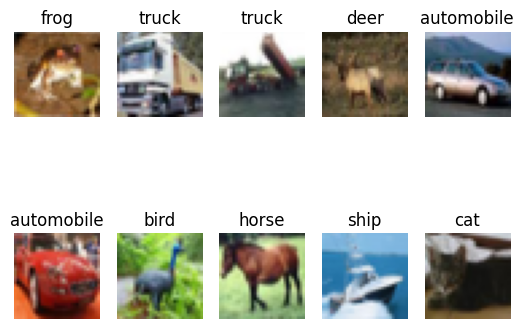

In [9]:
# Load the FashionMNIST dataset from torchvision
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

class_to_label = {i: class_name for i, class_name in enumerate(train_data.classes)}

print(f"Loaded CIFAR10 dataset with {len(train_data)} samples.")
print(f"Classes: {train_data.classes}")
print(f"Image shape: {train_data.data[0].shape}")
print(f"Image dtype: {train_data.data[0].dtype}")

fig, ax = plt.subplots(nrows=2, ncols=5)
for i in range(10):
    ax[i // 5, i % 5].imshow(train_data.data[i])
    ax[i // 5, i % 5].set_title(class_to_label[train_data.targets[i]])
    ax[i // 5, i % 5].axis('off')
fig.show()


Columns: Index(['image', 'class', 'label'], dtype='object')
Shape: (50000, 3)
                                               image  class       label
0  [[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...      6        frog
1  [[[154, 177, 187], [126, 137, 136], [105, 104,...      9       truck
2  [[[255, 255, 255], [253, 253, 253], [253, 253,...      9       truck
3  [[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...      4        deer
4  [[[170, 180, 198], [168, 178, 196], [177, 185,...      1  automobile


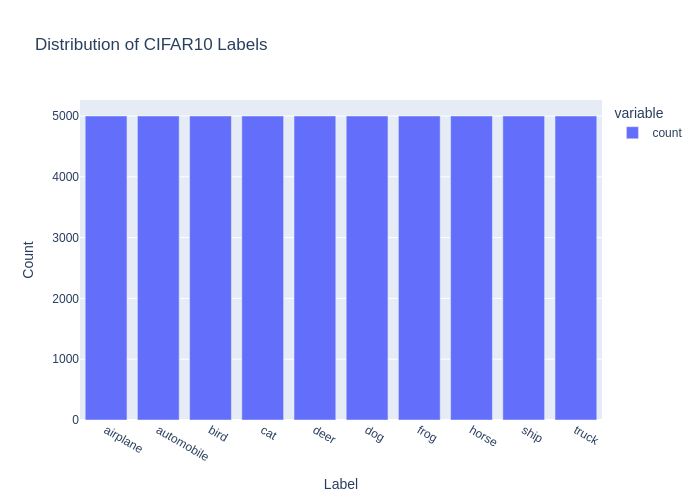

In [10]:
# TODO: Create a DataFrame with three columns: `image`, `class`, and `label`
data = {
    'image': [img for img in train_data.data],
    'class': train_data.targets,
    'label': [class_to_label[target] for target in train_data.targets]
}
df = pd.DataFrame(data)

print(f"Columns: {df.columns}")
print(f"Shape: {df.shape}")
print(df.head())

# TODO: Group the data in the CIFAR10 dataset by label and create a bar plot of the label distribution
label_counts = df['label'].value_counts().sort_index()
fig = label_counts.plot(kind='bar', title='Distribution of CIFAR10 Labels')
fig.update_layout(xaxis_title='Label', yaxis_title='Count')
fig.show()

<!-- END QUESTION -->

# Question 5

In this question, we will train a MLPClassifier (Multi-Layer Perceptron Classifier) on the CIFAR10 dataset.

**Task**:
1. Create a `train_df` and `test_df` from the CIFAR10 dataset using `train_test_split` with `test_size=0.2` and `random_state=SEED`
2. Normalize the pixel values of the CIFAR10 dataset using StandardScaler
3. Train a MLPClassifier on the normalized training dataset
4. Extract the loss curve from the MLPClassifier using the `model.loss_curve_` attribute and plot the loss curve as a line plot with number of epochs on the x-axis and loss on the y-axis

Train shape: (40000, 3)

 Test shape: (10000, 3)
Train head:                                                    image  class  label
14752  [[[62, 151, 216], [62, 149, 211], [64, 148, 21...      2   bird
20828  [[[159, 118, 84], [162, 119, 82], [159, 117, 7...      4   deer
39859  [[[48, 67, 83], [111, 126, 135], [201, 208, 20...      9  truck
13754  [[[215, 216, 211], [212, 213, 208], [213, 214,...      6   frog
48385  [[[176, 209, 233], [182, 211, 235], [186, 211,...      9  truck

 Test head:                                                    image  class       label
14158  [[[222, 224, 229], [224, 227, 232], [226, 229,...      8        ship
20852  [[[66, 121, 165], [66, 120, 163], [64, 118, 16...      0    airplane
5465   [[[199, 224, 195], [197, 224, 194], [197, 226,...      9       truck
16760  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [0, 0, 0], ...      6        frog
44625  [[[209, 210, 213], [206, 209, 212], [204, 210,...      1  automobile
X_train shape: (40000, 3072)	 y_train shape:

/home/xichen/dev/BKL-fa25-student/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



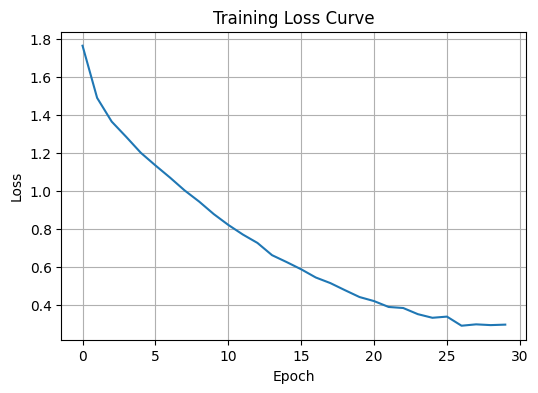

Model training accuracy: 0.916825
Model test accuracy: 0.5038


In [11]:
# Create train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)

print(f"Train shape: {train_df.shape}\n\n Test shape: {test_df.shape}")
print(f"Train head: {train_df.head()}\n\n Test head: {test_df.head()}")

# flatten features into 1D arrays
X_train = np.stack(train_df['image'].values).reshape(-1, 32*32*3)
y_train = train_df['class'].values
X_test = np.stack(test_df['image'].values).reshape(-1, 32*32*3)
y_test = test_df['class'].values

print(f"X_train shape: {X_train.shape}\t y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}\t y_test shape: {y_test.shape}")

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

if load_saved_models and os.path.exists('model.joblib'):
    model = joblib.load('model.joblib')
    # TODO: Plot the loss curve from the loaded model
    # Plot loss curve from loaded model
    if hasattr(model, "loss_curve_"):
        plt.figure(figsize=(6, 4))
        plt.plot(model.loss_curve_)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss Curve (Loaded Model)")
        plt.grid(True)
        plt.show()
    pass
else:
    # TODO: Train the model using the scaled traning data and plot the loss curve
    model = MLPClassifier(
        hidden_layer_sizes=(512, 256),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        batch_size=128,
        learning_rate_init=1e-3,
        max_iter=30,
        random_state=SEED,
        verbose=True
    )
    model.fit(X_train_sc, y_train)

    # Plot loss curve
    plt.figure(figsize=(6, 4))
    plt.plot(model.loss_curve_)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.grid(True)
    plt.show()
    pass
if save_models:
    joblib.dump(model, 'model.joblib')

print(f"Model training accuracy: {model.score(X_train_sc, y_train)}")
print(f"Model test accuracy: {model.score(X_test_sc, y_test)}")

In [12]:
grader.check("q5")

q5 results: All test cases passed!

# Question 6

Make predictions on the CIFAR10 dataset and plot the accuracy of the predictions.

**Task**:
1. Make predictions on the `train_df` and `test_df` dataframes using the trained model
2. Calculate the accuracy of the predictions
3. Create two bar plots of the accuracy of the predictions per class: one bar plot for the training set and one for the test set. The bar plot should have labels (e.g. 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') on the x-axis and accuracy on the y-axis.

<!-- BEGIN QUESTION -->



Train accuracy: 0.916825
Test accuracy: 0.5038


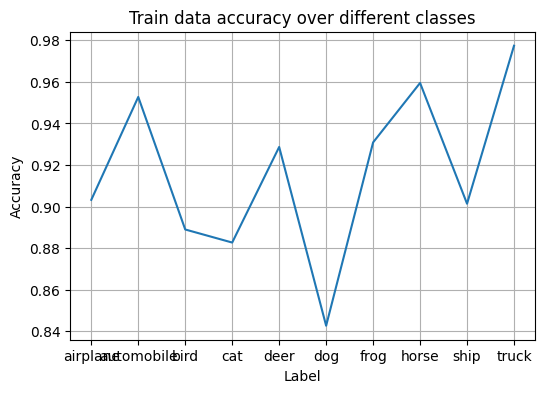

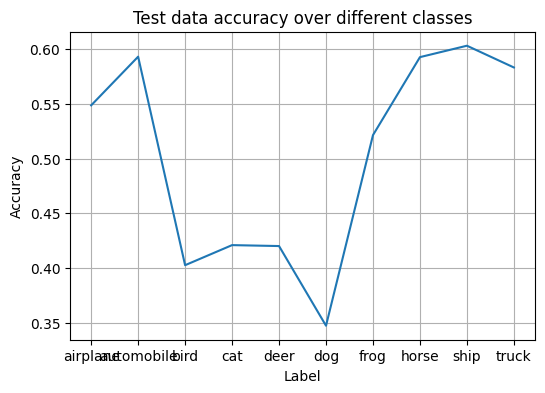

In [13]:
# TODO: Make predictions on train_df and test_df
train_df['prediction'] = model.predict(X_train_sc)
test_df['prediction'] = model.predict(X_test_sc)

train_df['correct'] = train_df['prediction'] = (train_df['class'] == train_df['prediction'])
test_df['correct'] = test_df['prediction'] = (test_df['class'] == test_df['prediction'])

print(f"Train accuracy: {train_df['correct'].mean()}")
print(f"Test accuracy: {test_df['correct'].mean()}")


# TODO: Create two bar plots of the accuracy of the predictions per class
# with labels on the x-axis and accuracy on the y-axis
train_fig = plt.figure(figsize=(6, 4))
plt.plot(train_df.groupby('label')['correct'].mean())
plt.xlabel("Label")
plt.ylabel("Accuracy")
plt.title("Train data accuracy over different classes")
plt.grid(True)
train_fig.show()

test_fig = plt.figure(figsize=(6,4))
plt.plot(test_df.groupby('label')['correct'].mean())
plt.xlabel("Label")
plt.ylabel("Accuracy")
plt.title("Test data accuracy over different classes")
plt.grid(True)
test_fig.show()


In [14]:
grader.check("q5")

q5 results: All test cases passed!

<!-- END QUESTION -->

### Before you submit, ensure `save_models` is true!

**Important for grading**: Make sure you set these variables to True at the top of your notebook before submitting.

In [17]:
assert save_models and load_saved_models, "save_models and load_saved_models must be True"

assert os.path.exists('model.joblib'), "model.joblib should exist"

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [18]:
## Use this cell if you are running the notebook in Google Colab to install the necessary dependencies, this may take a few minutes
if IS_COLAB:
    !apt-get install -y texlive texlive-xetex pandoc


In [19]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True, files=['model.joblib'])

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q5 results: All test cases passed!
